# Support Vector Machines

The SVM model is a distance-based algorithm, similar to KNN, but has more tunable parameters, so I wanted to try it out. This one also takes the longest to run, making tuning those parameters a real chore.

In [1]:
import pandas as pd
from scripts import get_metrics
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

In [2]:
df = pd.read_csv('../data/cleaned_data.csv', index_col='id')
df

,status_group,longitude,latitude,population,construction_year,funder_communal standpipe,funder_communal standpipe multiple,funder_hand pump,funder_improved spring,funder_other,...,source_other,source_rainwater harvesting,source_river,source_shallow well,source_spring,waterpoint_type_communal standpipe,waterpoint_type_communal standpipe multiple,waterpoint_type_hand pump,waterpoint_type_improved spring,waterpoint_type_other
id,,,,,,,,,,,,,,,,,,,,,
69572,functional,0.496455,0.168353,0.003541,0.735849,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
8776,functional,0.474167,0.892122,0.009148,0.943396,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
34310,functional,0.731374,0.734967,0.008164,0.924528,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
67743,non functional,0.826875,0.046394,0.001869,0.490566,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
19728,functional,0.141899,0.922364,0.013692,0.852830,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60739,functional,0.704287,0.788246,0.004066,0.735849,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
27263,functional,0.525501,0.242120,0.001803,0.679245,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
37057,functional,0.410685,0.272182,0.003836,0.924528,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [3]:
y = df['status_group']
X = df.drop(['status_group'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=212)

## Baseline Model

In [4]:
baseline = SVC()
baseline.fit(X_train, y_train)
get_metrics(y_test, X_test, baseline)

{'accuracy': 0.7703703703703704,
 'f1': 0.7490681311609566,
 'precision': 0.7658791378307882,
 'recall': 0.7703703703703704}

## GridSearch CV

Which parameters are tunable depend on the kernel chosen. rbf seems to be better for not-easily-seperable data, so I chose it. I believe the balanced value for class_weight would be better for most models, but I am using solely accuracy as my scoring metric, and so it is less useful in this case.

In [4]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = {
    'C': [0.1, 1, 10, 100], # default 1.0
    'kernel': ['rbf'], # default 'rbf'
    'gamma': [0.001, 0.01, 0.1, 1], # default 'scale'
    'class_weight': [None, 'balanced'], # default None
}
svc = SVC()
grid_search = GridSearchCV(svc, param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train)

In [7]:
grid_search.best_params_

{'C': 10, 'class_weight': None, 'gamma': 0.1, 'kernel': 'rbf'}

In [8]:
svc_tuned = SVC(C=10, kernel='rbf', gamma=0.1, class_weight=None)
svc_tuned.fit(X_train, y_train)
get_metrics(y_test, X_test, svc_tuned)

{'accuracy': 0.775084175084175,
 'f1': 0.7610356464920425,
 'precision': 0.7664295252943402,
 'recall': 0.775084175084175}

In [5]:
param_grid = {
    'C': [5, 10, 50], # default 1.0
    'kernel': ['rbf'], # default 'rbf'
    'gamma': [0.05, 0.1, 0.5], # default 'scale'
    'class_weight': [None], # default None
}
svc = SVC()
grid_search = GridSearchCV(svc, param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=SVC(),
             param_grid={'C': [5, 10, 50], 'class_weight': [None],
                         'gamma': [0.05, 0.1, 0.5], 'kernel': ['rbf']},
             scoring='accuracy')

In [6]:
grid_search.best_params_

{'C': 5, 'class_weight': None, 'gamma': 0.1, 'kernel': 'rbf'}

In [7]:
svc_tuned = SVC(C=5, kernel='rbf', gamma=0.1, class_weight=None)
svc_tuned.fit(X_train, y_train)
get_metrics(y_test, X_test, svc_tuned)

{'accuracy': 0.7757575757575758,
 'f1': 0.7599310142186181,
 'precision': 0.7680019416187246,
 'recall': 0.7757575757575758}

## Bagging

Bagging seems to have some small improvement for SVM, so I will use it in the final model.

In [4]:
from sklearn.ensemble import BaggingClassifier

In [5]:
svc_bagged = BaggingClassifier(SVC(C=5, kernel='rbf', gamma=0.1, class_weight=None))  
svc_bagged.fit(X_train, y_train)
get_metrics(y_test, X_test, svc_bagged)

{'accuracy': 0.775959595959596,
 'f1': 0.7601798972167861,
 'precision': 0.7683720458118004,
 'recall': 0.775959595959596}

## Confusion Matrix

In [6]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

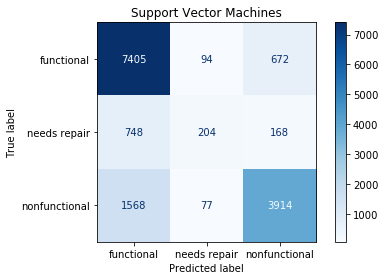

In [7]:
plot_confusion_matrix(svc_bagged, X_test, y_test, display_labels=['functional', 'needs repair', 'nonfunctional'], cmap=plt.cm.Blues)
plt.title('Support Vector Machines')
plt.tight_layout()
plt.savefig('../visualizations/svc-confusion-matrix.png')
plt.show()

## Conclusions

SVM performs worse than any of my other tuned models. This is likely because it performs best on more easily seperable data. I don't expect it to have good performance as the final model.